## Load Dataset into the Drive using Kaggle API

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.layers import Dense,Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers, optimizers
import tensorflow as tf
from tensorflow.keras.applications import ResNet50,VGG16,ResNet101, VGG19, DenseNet201, EfficientNetB4, MobileNetV2
from tensorflow.keras.applications import resnet, vgg16 , vgg19, densenet, efficientnet, mobilenet_v2
from tensorflow.keras import Model

from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.metrics import categorical_crossentropy


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import PIL
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

In [ ]:
! pip install -Uq kaggle
! pip install -Uq fastai==2.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.2/191.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.8/776.8 MB 2.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.7.1 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.7.1 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.7.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyashukla01","key":"b0652e31cce9e0350fd087c244990d74"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 97% 115M/119M [00:00<00:00, 225MB/s] 
100% 119M/119M [00:00<00:00, 227MB/s]


In [ ]:
! unzip -qq chest-ctscan-images.zip

### Create a new dataset with cancerous and non cancerous images

In [ ]:
# Create a new dataset with cancerous and non cancerous images
! mkdir ct_scan

! mkdir ct_scan/train
! mkdir ct_scan/train/cancerous
! mkdir ct_scan/train/non_cancerous
! cp -r Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/. ct_scan/train/cancerous/
! cp -r Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/. ct_scan/train/cancerous/
! cp -r Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/. ct_scan/train/cancerous/
! cp -r Data/train/normal/. ct_scan/train/non_cancerous/


! mkdir ct_scan/valid
! mkdir ct_scan/valid/cancerous
! mkdir ct_scan/valid/non_cancerous
! cp -r Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/. ct_scan/valid/cancerous/
! cp -r Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/. ct_scan/valid/cancerous/
! cp -r Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/. ct_scan/valid/cancerous/
! cp -r Data/valid/normal/. ct_scan/valid/non_cancerous/

! mkdir ct_scan/test
! mkdir ct_scan/test/cancerous
! mkdir ct_scan/test/non_cancerous
! cp -r Data/test/adenocarcinoma/. ct_scan/test/cancerous/
! cp -r Data/test/large.cell.carcinoma/. ct_scan/test/cancerous/
! cp -r Data/test/squamous.cell.carcinoma/. ct_scan/test/cancerous/
! cp -r Data/test/normal/. ct_scan/test/non_cancerous/

In [ ]:
! ls ct_scan/train/cancerous | wc -l
! ls Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/ | wc -l
! ls Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/ | wc -l
! ls Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/ | wc -l

418
195
115
155


In [ ]:
# ! mkdir gdrive/MyDrive/SML_Project/testdata
# ! mkdir gdrive/MyDrive/SML_Project/testdata/non_cancerous
# ! mkdir gdrive/MyDrive/SML_Project/testdata/cancerous
# ! cp -r ct_scan/test/non_cancerous/. gdrive/MyDrive/SML_Project/testdata/non_cancerous/.
# ! cp -r ct_scan/test/cancerous/. gdrive/MyDrive/SML_Project/testdata/cancerous/.

mkdir: cannot create directory ‘gdrive/MyDrive/SML_Project/testdata’: File exists
mkdir: cannot create directory ‘gdrive/MyDrive/SML_Project/testdata/non_cancerous’: File exists
mkdir: cannot create directory ‘gdrive/MyDrive/SML_Project/testdata/cancerous’: File exists


In [ ]:
path = "ct_scan/train"
for files in os.listdir(path):
    print(os.path.join(path,files))

ct_scan/train/cancerous
ct_scan/train/non_cancerous


In [ ]:
! rm -R ct_scan/train/.ipynb_checkpoints
! rm -R ct_scan/valid/.ipynb_checkpoints

rm: cannot remove 'ct_scan/train/.ipynb_checkpoints': No such file or directory
rm: cannot remove 'ct_scan/valid/.ipynb_checkpoints': No such file or directory


In [ ]:
image_paths = ['Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
'Data/train/normal',
'Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']

def load_images(image_paths = image_paths, n=16):
    # Load the images from disk.
    images = []
    for i in range(len(image_paths)):
        images_ = [cv2.imread(image_paths[i]+'/'+path) for path in os.listdir(image_paths[i])[:int(n/4)]]
        images.append(images_)
    # Convert to a numpy array and return it.
    sample = np.asarray(images)
    return sample

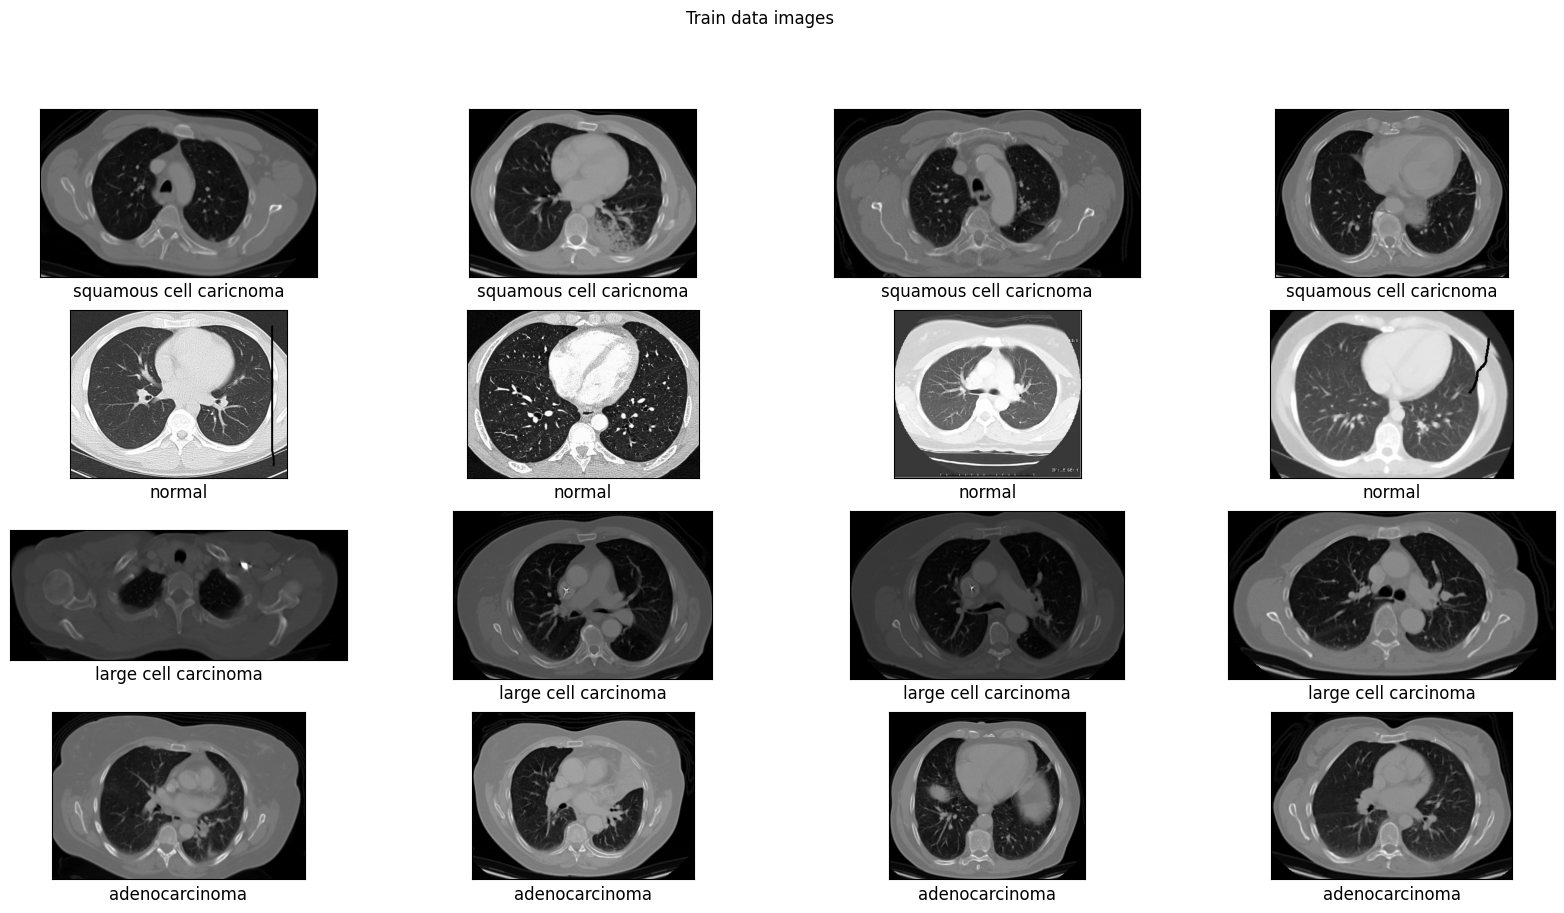

In [ ]:
sample = load_images()
fig = plt.figure(figsize=(20,10))
l = 1
shapes = []
image_category = ["squamous cell caricnoma", "normal", "large cell carcinoma",  "adenocarcinoma"]
fig.suptitle("Train data images")
for i in range(sample.shape[0]):
    for m in range(sample.shape[1]):
        ax = fig.add_subplot(4,4,m+l,xticks = [], yticks = [])
        ax.set_xlabel(image_category[i], fontsize=12)
        ax.imshow(np.squeeze(sample[i,m]))
        shapes.append(sample[i,m].shape)
    l +=4

# ResNet50

In [ ]:
train_path = "ct_scan/train"
valid_path = "ct_scan/valid"
test_path = "ct_scan/test"

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 2
BATCH_SIZE = 32

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 2
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32')#, preprocessing_function=resnet.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')#, preprocessing_function=resnet.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')#, preprocessing_function=resnet.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 566 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Found 278 images belonging to 2 classes.


### ResNet-50 Model architectue

In [ ]:
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
model = Sequential()
model.add(res_model)
model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(N_CLASSES, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                        

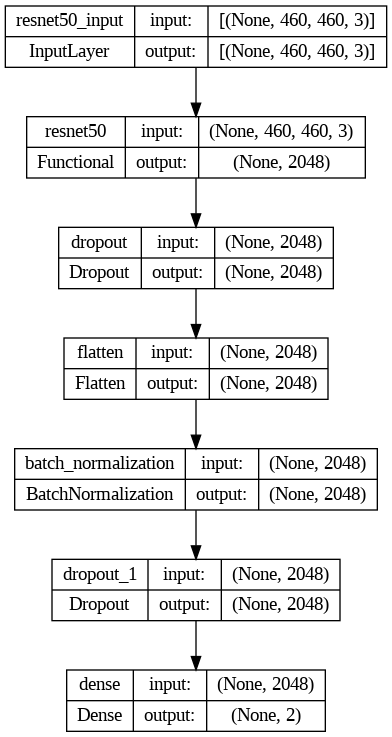

In [ ]:
# show schematic of model:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
optimizer = Adam(learning_rate= 0.00001, decay=0.0005)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/SML_Project/chest_CT_SCAN-ResNet50.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=20)

In [ ]:
test_generator.class_indices

{'cancerous': 0, 'non_cancerous': 1}

In [ ]:
history_res = model.fit(train_generator,
                    steps_per_epoch = 10,
                    epochs = 10,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.7113 - acc: 0.7281 
Epoch 1: val_loss improved from inf to 0.51831, saving model to /content/gdrive/My Drive/SML_Project/chest_CT_SCAN-ResNet50.hdf5
10/10 [==============================] - 380s 39s/step - loss: 0.7113 - acc: 0.7281 - val_loss: 0.5183 - val_acc: 0.7619
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.5091 - acc: 0.8000 
Epoch 2: val_loss improved from 0.51831 to 0.37390, saving model to /content/gdrive/My Drive/SML_Project/chest_CT_SCAN-ResNet50.hdf5
10/10 [==============================] - 322s 33s/step - loss: 0.5091 - acc: 0.8000 - val_loss: 0.3739 - val_acc: 0.9048
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.4007 - acc: 0.8452 
Epoch 3: val_loss improved from 0.37390 to 0.29152, saving model to /content/gdrive/My Drive/SML_Project/chest_CT_SCAN-ResNet50.hdf5
10/10 [==============================] - 320s 32s/step - loss: 0.4007 - acc: 0.8452 - val_los

In [ ]:
result = model.evaluate(test_generator)

9/9 [==============================] - 179s 20s/step - loss: 0.1494 - acc: 0.9964


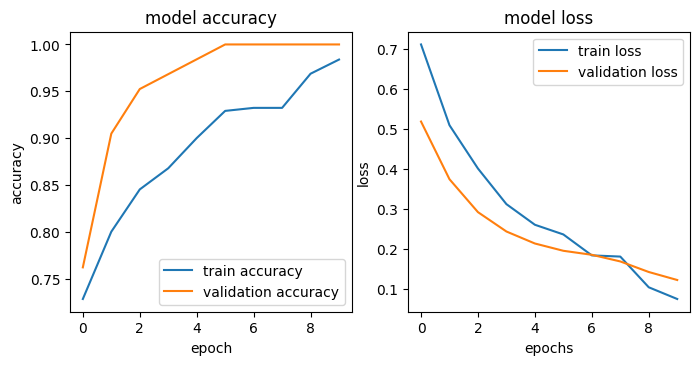

In [ ]:
# plt.plot(history_res.history['acc'], label = 'train',)
# plt.plot(history_res.history['val_acc'], label = 'val')

# plt.legend(loc = 'right')
# plt.xlabel('epochs')
# plt.ylabel('accuracy')
# plt.show()

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.plot(history_res.history['acc'])
plt.plot(history_res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy','validation accuracy'])

plt.subplot(222)
plt.plot(history_res.history['loss'])
plt.plot(history_res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'validation loss'])

plt.show()

### Serialize ResNet model

In [ ]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/SML_Project/model_resnet50.json","w") as json_file:
  json_file.write(model_json)

**Implement Lime**

In [ ]:
! pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import model_from_json
from keras.optimizers import SGD
from google.colab.patches import cv2_imshow


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as c_map
from IPython.display import Image, display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import lime
from lime import lime_image
from lime import submodular_pick

from skimage.segmentation import mark_boundaries

np.random.seed(123)

In [ ]:
IMG_SIZE = (460, 460)
def transform_image(img):
    '''
    Function to transform an image to normalized numpy array
    '''
    img = image.img_to_array(img)# Transforming the image to get the shape as [channel, height, width]
    img = np.expand_dims(img, axis=0) # Adding dimension to convert array into a batch of size (1,299,299,3)
    img = img/255.0 # normalizing the image to keep within the range of 0.0 to 1.0
    
    return img

In [ ]:
test_generator.class_indices

{'cancerous': 0, 'non_cancerous': 1}

In [ ]:
def get_model_predictions(data):
    model_prediction = model.predict(data)
    if model_prediction[0][0] > model_prediction[0][1] :
      print(f"The predicted class is : cancerous with probability - {model_prediction[0][0]}")
    else :
      print(f"The predicted class is : non cancerous with probability - {model_prediction[0][1]}")
    # return decode_predictions(model_prediction, top=1)[0][0][1]

In [ ]:
from skimage.segmentation import mark_boundaries

def masked_explaind_images(exp) :
  temp_1, mask_1 = exp.get_image_and_mask(exp.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
  temp_2, mask_2 = exp.get_image_and_mask(exp.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
  ax1.imshow(mark_boundaries(temp_1, mask_1))
  ax2.imshow(mark_boundaries(temp_2, mask_2))
  ax1.axis('off')
  ax2.axis('off')

In [ ]:
explainer = lime_image.LimeImageExplainer()
def lime(path):
  img = image.load_img(path, target_size=IMG_SIZE)
  normalized_img = transform_image(img)

  plt.imshow(normalized_img[0])

  exp = explainer.explain_instance(normalized_img[0], 
                                  model.predict)
  masked_explaind_images(exp)



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 6s 6s/step


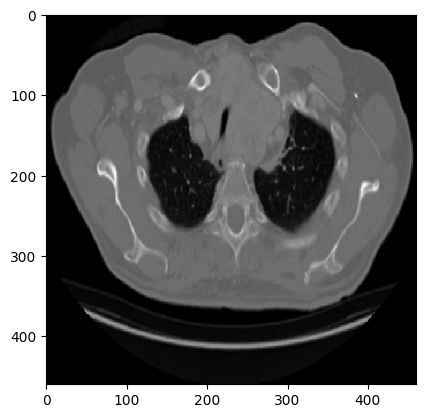

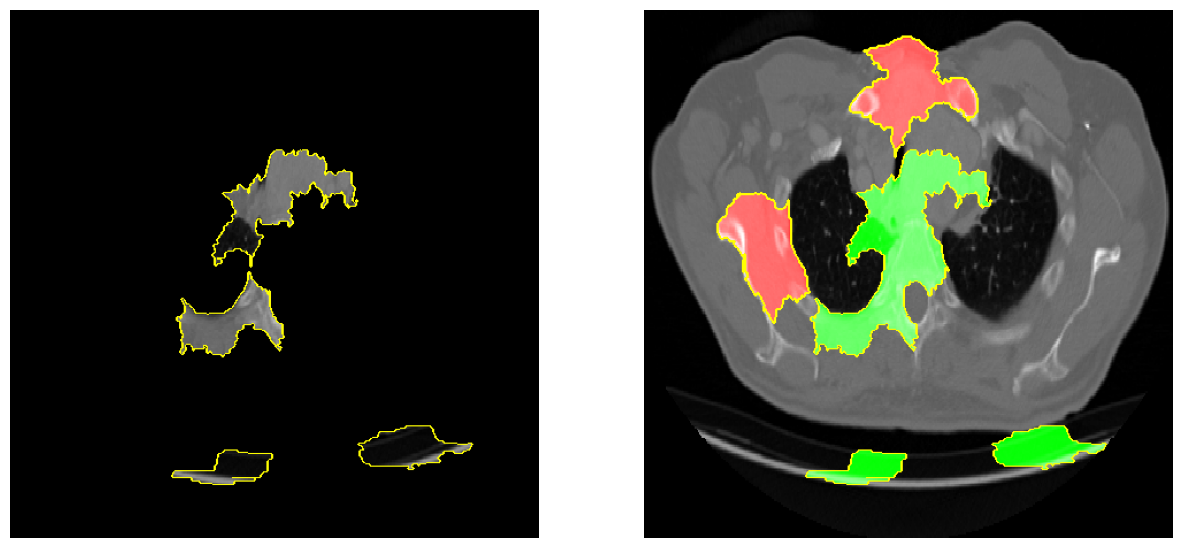

In [ ]:
image_paths = ["/content/ct_scan/test/cancerous/000108.png", "/content/ct_scan/test/non_cancerous/21.png"]

lime(image_paths[0])

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 6s 6s/step


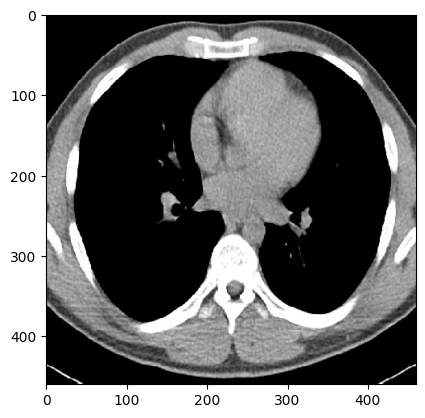

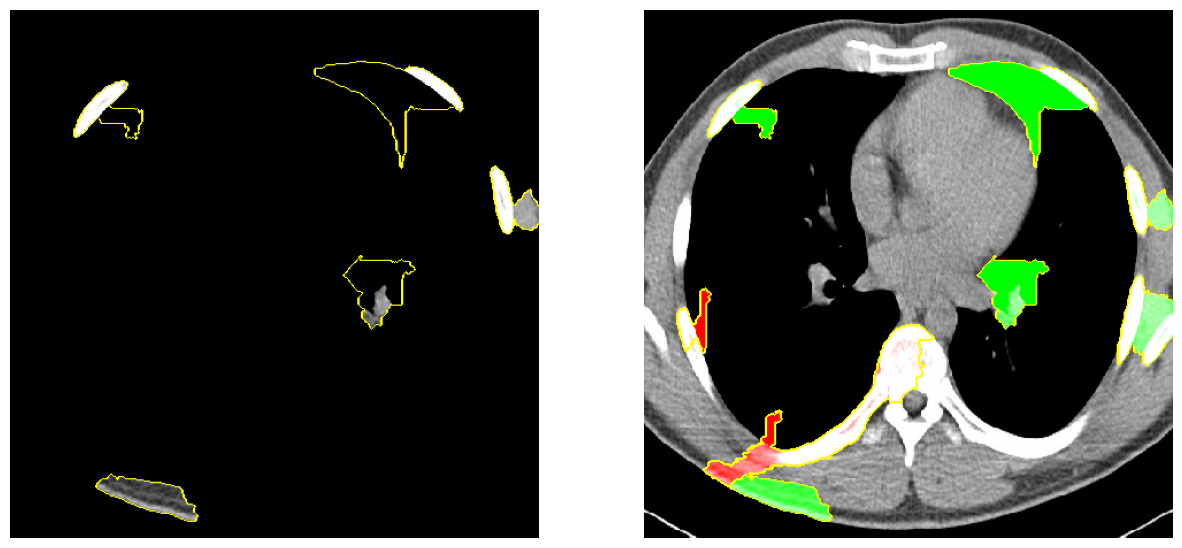

In [ ]:
lime(image_paths[1])